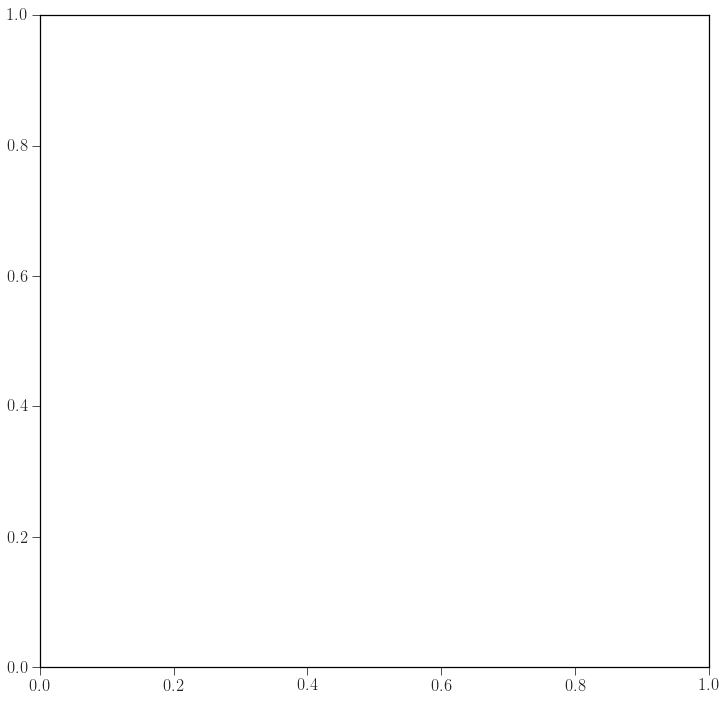

In [4]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import rc
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
plt.rcParams["patch.force_edgecolor"] = True
plt.rcParams['axes.edgecolor'] = 'black'

plt.tick_params(size = 8 ,labelsize = 'large')

plt.rc('text', usetex=True)

font = {'family' : 'normal',
        'weight' : 'regular',
        'size'   : 14}

rc('font', **font)

You can add two images by OpenCV function, cv2.add() or simply by numpy operation, res = img1 + img2. Both images should be of same depth and type, or second image can just be a scalar value.



$\textbf{Note}$ : There is a difference between OpenCV addition and Numpy addition. OpenCV addition is a saturated operation while Numpy addition is a modulo operation. 

In [5]:
x = np.uint8([250])
y = np.uint8([10])

print (f"Sum using cv2 : {cv2.add(x, y)}")
print (f"Sum using numpy : {x + y}")

Sum using cv2 : [[255]]
Sum using numpy : [4]


It will be more visible when you add two images. 
OpenCV function will provide a better result. So always better stick to OpenCV functions.

# Image blending

This is also image addition, but different weights are given to images so that it gives a feeling of blending or transparency. Images are added as per the equation below:

$$
g(x) = \left( 1 - \alpha \right) f_0 (x) + \alpha f_1 (x)
$$

By varying $\alpha$ from 0 to 1 you can perform a cool transition between one image to another. Moreover, one can obtain a combination of two images simply by taking them with certain weights $\alpha$, $\beta$ and $\gamma$:

$$
\text{dst } = \alpha \text{ img1} + \beta \text{ img2} + \gamma
$$

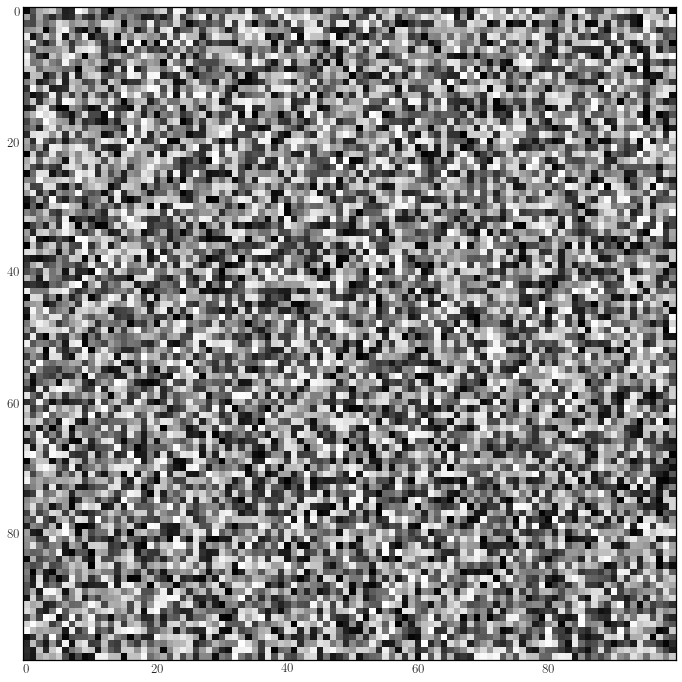

In [6]:
alpha = 0.5
beta = 0.5

img1 = cv2.imread("random_0.png")
img2 = cv2.imread("random_3.png")

dst = alpha * img1 + beta * img2

plt.imshow(dst)
plt.show()

# Bitwise operations



This includes bitwise AND, OR, NOT and XOR operations. They will be highly useful while extracting any part of the image (as we will see in coming chapters), defining and working with non-rectangular ROI etc. Below we will see an example on how to change a particular region of an image.

I want to put OpenCV logo above an image. If I add two images, it will change color. If I blend it, I get an transparent effect. But I want it to be opaque. If it was a rectangular region, I could use ROI as we did in last chapter. But OpenCV logo is a not a rectangular shape. So you can do it with bitwise operations as below:

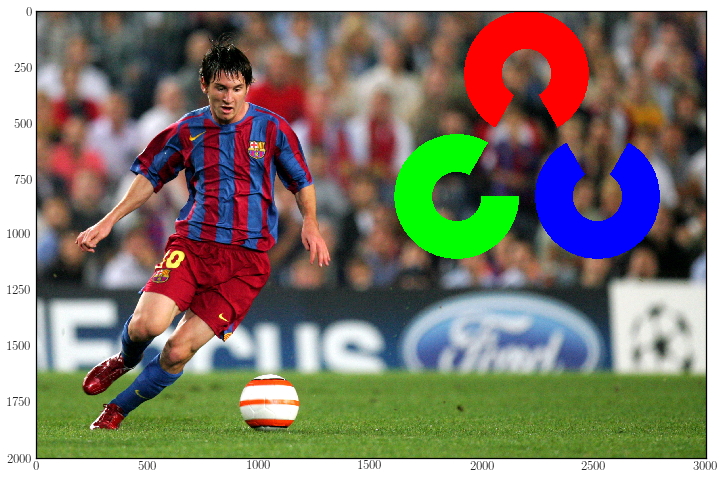

In [14]:
# Load two images
img1 = cv2.imread('messi5.jpg')
img2 = cv2.imread('opencv-logo.png')

# I want to put logo on top-right corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 1600 : 2800 ]


# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 1600 : 2800 ] = dst

#cv2.imshow('res',img1)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.imshow(img1)
plt.show()

In [20]:
cols

1200